# Heart Disease Prediction Using Machine Learning Models

## Importing the required libreries

In [2]:
# Importing the required libreries

#Importing the EDA - Exploratory Data Analysis and plotting libreries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing the Models from Sci-kit Learn

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Importing the Models for Evaluation

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,make_scorer
from sklearn.metrics import RocCurveDisplay

#Importing the warning ignorner
import warnings
warnings.filterwarnings("ignore")


## Starting with Data Cleaning Process

Reading CSV file using `.read_csv()` method in pandas and getting started with data cleaning process

In [3]:
df = pd.read_csv("Data/heart_disease.csv")

Displaying the first 5 Rows of the dataset using `.head()` method

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Using the `.info()` method, we can obtain information about a dataset, including the data types of each column, column names, and the number of non-null values in each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


`.isnull().sum()` gives the total sum of NaN values in each column respectively

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The `.describe()` method give the idea about the dataframe with mean, standard devitation etc...

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking for duplicates in the dataframe using `.duplicated()` method

In [8]:
df.duplicated().sum()

723

Removing 723 duplicated values or repeated rows using `.drop_duplicates()`

In [9]:
df = df.drop_duplicates()

In [10]:
#Re-checking for deplicates
df.duplicated().sum()

0

In [11]:
# Getting info of cleaned DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


# EDA - Exploratory Data Analysis with the cleaned data 

Let's see the distribution of heart disease cases (affected and non-affected) using `.value_counts()`

In [12]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

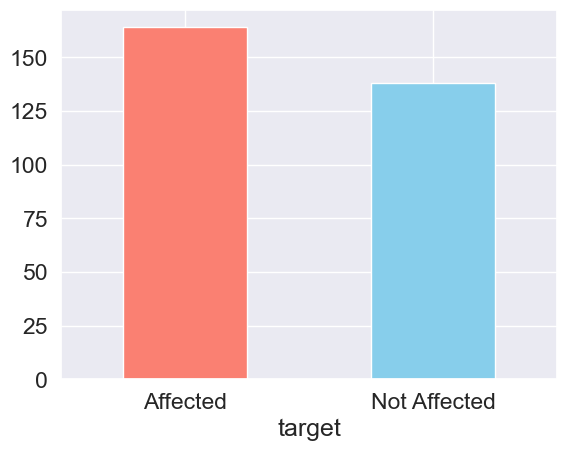

In [67]:
ax = df['target'].value_counts().plot(kind='bar',color = ['salmon','skyblue'])
ax.set_xticklabels(['Affected', 'Not Affected'], rotation=0)

plt.show()

Heart diseases frequency with sex

In [14]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

In [15]:
#using crosstab for comparision
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,92


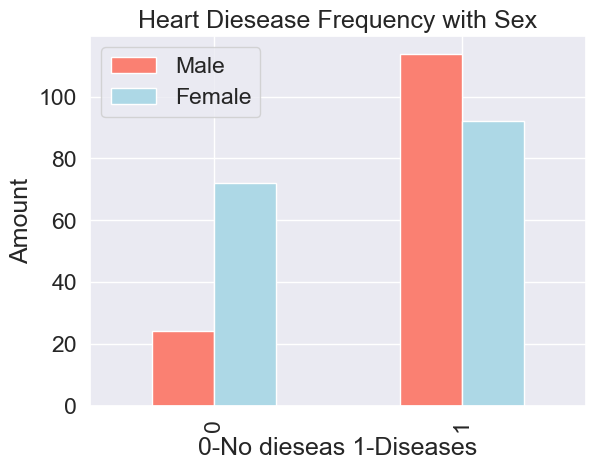

In [69]:
pd.crosstab(df.sex,df.target).plot(kind='bar',color=['salmon','lightblue'])
plt.title("Heart Diesease Frequency with Sex")
plt.legend(['Male','Female'])
plt.xlabel('0-No dieseas 1-Diseases')
plt.ylabel('Amount')
plt.show()

Age vs Heart Rate for Heart disease

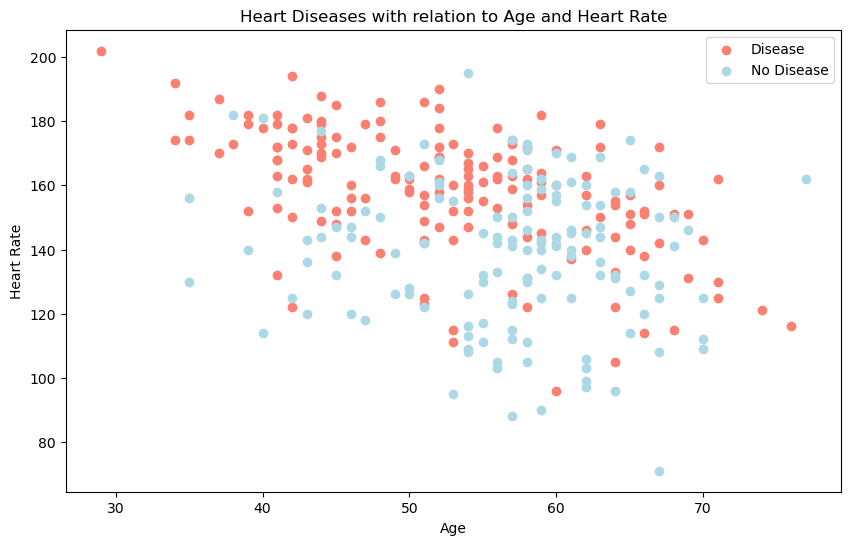

In [17]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color='salmon')

plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color='lightblue')

plt.title("Heart Diseases with relation to Age and Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(['Disease','No Disease']);

Lets see the age distribution using histrogram

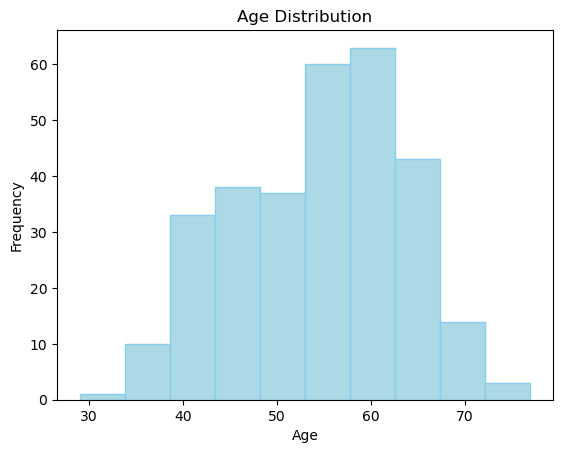

In [18]:
df.age.plot(kind='hist',color='lightblue',edgecolor='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### Chest pain related to Heart Diesease

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [19]:
df.cp.value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

In [20]:
pd.crosstab(df.sex,df.cp)

cp,0,1,2,3
sex,,,,
0,39,18,35,4
1,104,32,51,19


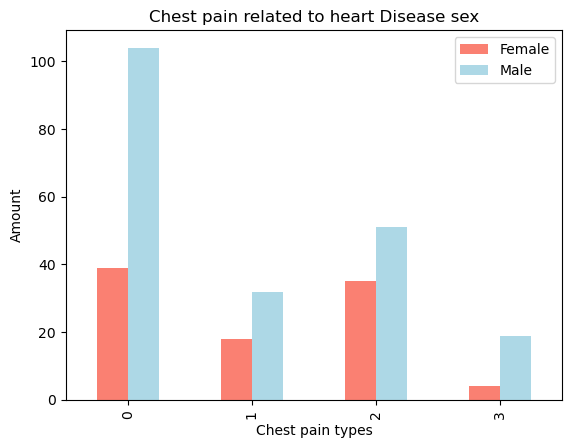

In [21]:
pd.crosstab(df.cp,df.sex).plot(kind='bar',color=['salmon','lightblue'])
plt.title("Chest pain related to heart Disease sex")
plt.xlabel("Chest pain types")
plt.ylabel("Amount")
plt.legend(['Female','Male']);

Seeing the correlation

In [22]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


### Correlation Matrix

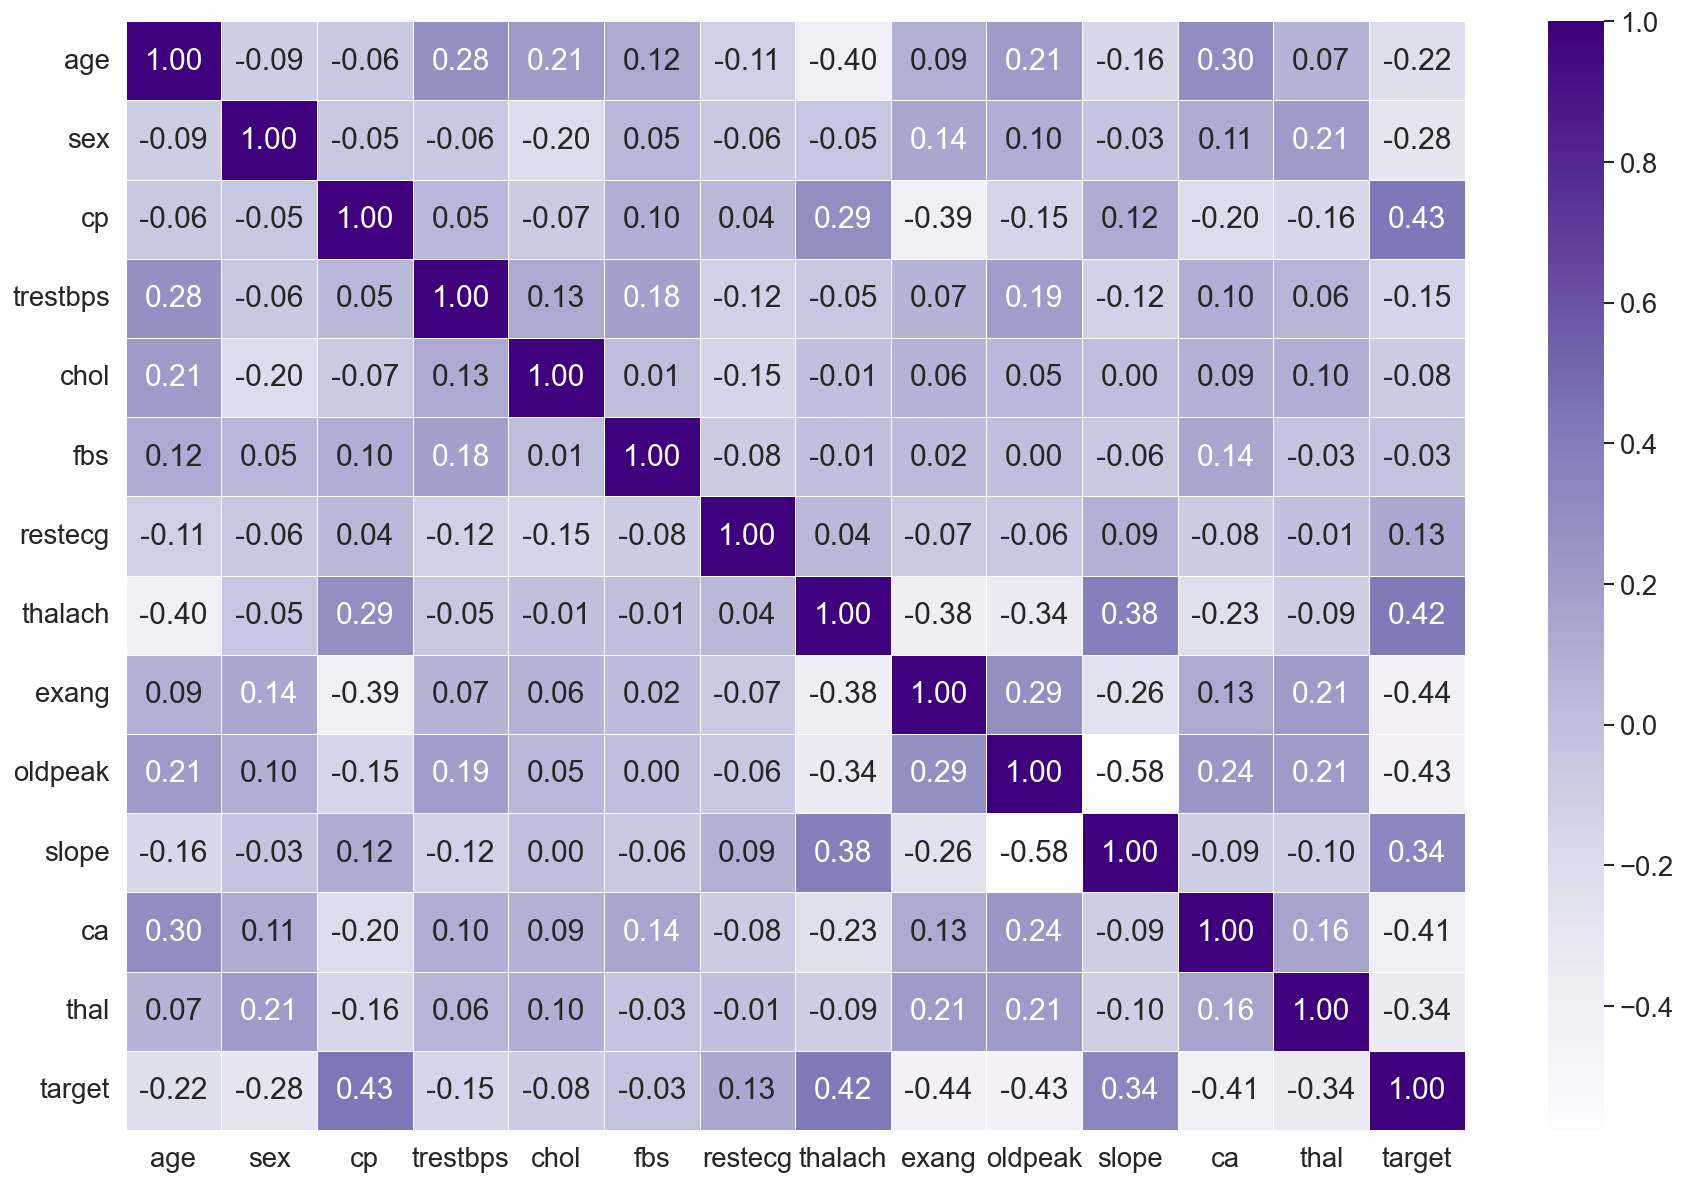

In [89]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(18,12),dpi=120)
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap="Purples")
plt.show()

# Training the Machine Learning models 

Spliting the `Features variables` and `Target variables`

In [24]:
x = df.drop('target',axis=1)

y = df['target']

Spliting the dataset for training and testing purpose 

In [25]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Traing the Model 

In [26]:
rfclf = RandomForestClassifier()
rfclf.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
rfclf.score(x_test,y_test)*100

83.60655737704919

In [28]:
# Testing all Three models together

models = {'LogisticRegression':LogisticRegression(),
         'KNeighborsClassifier':KNeighborsClassifier(),
         'RandomForestClassifier':RandomForestClassifier()}

def fit_score_models(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_score = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name] = model.score(x_test,y_test)
    return model_score

model_scores = fit_score_models(models,x_train,x_test,y_train,y_test)
model_scores

{'LogisticRegression': 0.8032786885245902,
 'KNeighborsClassifier': 0.639344262295082,
 'RandomForestClassifier': 0.8360655737704918}

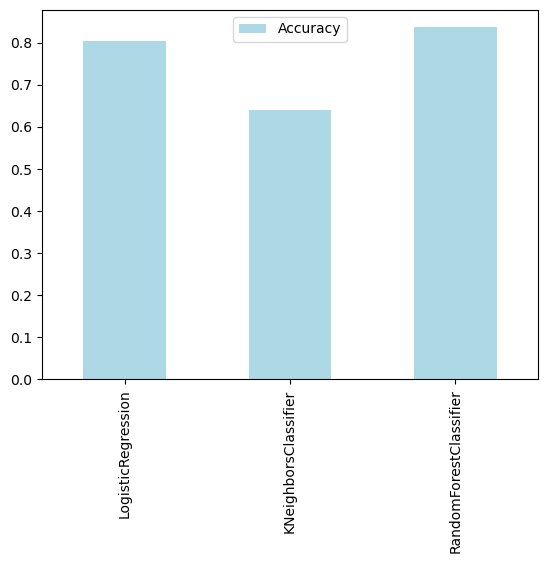

In [29]:
model_comparision = pd.DataFrame(model_scores,index=["Accuracy"])
model_comparision.T.plot(kind='bar',color='lightblue');

In [30]:
model_scores

{'LogisticRegression': 0.8032786885245902,
 'KNeighborsClassifier': 0.639344262295082,
 'RandomForestClassifier': 0.8360655737704918}

## Hyperparameter Tuning

For imporving the model accuracy and to make model faster with more efficiency

The maximum Score of the KNN model is 67.21


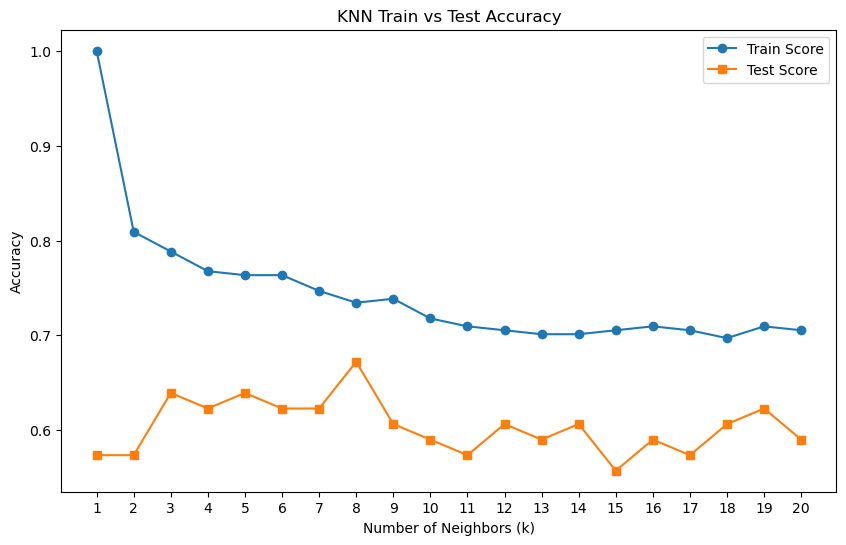

In [31]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_scores = []
test_scores = []

neighbours = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i) 
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))


print(f"The maximum Score of the KNN model is {max(test_scores)*100:.2f}")
plt.figure(figsize=(10, 6))
plt.plot(neighbours, train_scores, label="Train Score", marker='o')
plt.plot(neighbours, test_scores, label="Test Score", marker='s')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(False)
plt.xticks(np.arange(1,21,1))
plt.legend()
plt.title("KNN Train vs Test Accuracy")
plt.show()


### Now let we tune the other two models
    * LogisticRegression
    * RandomForestClassification
using RandomizedsearchCV

In [32]:
log_reg_grid = {
    'solver': ['liblinear', 'lbfgs'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'max_iter': [100, 200, 300]
}

ran_clf_grid = {'n_estimators' : np.arange(10,1000,50),
               'max_depth':[None,3,5,10],
               'min_samples_split':np.arange(2,20,2),
               'min_samples_leaf':np.arange(1,20,2)}

##### Now we have done the grid setup for tuning the models using RandomizedSearchCV 

lets start tuning for LogisticRegression()

In [33]:
np.random.seed(42)
#setting up random hyperparametric search for LogisticRegression()
rsc_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                 cv = 5,
                                n_iter=20,
                                verbose=True)

#Fitting the training Data to thr model
rsc_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 200, 300],
                                        'solver': ['liblinear', 'lbfgs']},
                   verbose=True)

In [34]:
rsc_log_reg.score(x_test,y_test)

0.8032786885245902

In [35]:
rsc_log_reg.best_params_

{'solver': 'lbfgs', 'max_iter': 100, 'C': 1}

let Start tuning for RandomForestClassifier()

In [36]:
np.random.seed(42)
#setting up random hyperparametric search for RandomForestClassifier()
rsc_rf_clf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=ran_clf_grid,
                               cv = 5,
                               n_iter=20,
                               verbose=True)

rsc_rf_clf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

Now, `.best_params_` returns the optimal parameters for the model to achieve the highest accuracy score

In [37]:
rsc_rf_clf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [38]:
rsc_rf_clf.score(x_test,y_test)

0.8360655737704918

In [39]:
model_scores

{'LogisticRegression': 0.8032786885245902,
 'KNeighborsClassifier': 0.639344262295082,
 'RandomForestClassifier': 0.8360655737704918}

### Hyperparametric Tuning using GridSearchCV

Since the `RandomForestClassifier()` model provides the best scores so far, we can try and improve the model using GridSearchCV

Basically GridSearchCV improves the model accuracy using cross-validation.

In [40]:
ran_clf_grid = {
    'n_estimators': [100, 300, 500, 800],  
    'max_depth': [10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 4, 8],  
    'max_features': ['sqrt'],  
    'bootstrap': [True]  
}


gs_rf_clf = GridSearchCV(RandomForestClassifier(),
                        param_grid=ran_clf_grid,
                        cv=5,
                        verbose=True)

gs_rf_clf.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 4, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500, 800]},
             verbose=True)

In [41]:
gs_rf_clf.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 5,
 'n_estimators': 500}

In [42]:
gs_rf_clf.score(x_test,y_test)

0.8360655737704918

In [43]:
model_scores

{'LogisticRegression': 0.8032786885245902,
 'KNeighborsClassifier': 0.639344262295082,
 'RandomForestClassifier': 0.8360655737704918}

### Evaluating the tuned machine learning models beyound accuracy

1. ROC and AUC curve
2. Confusion matrix
8. Classification Report
5. precision
6. Recall
7. F1 score

To make comparision and to evaluate model, we must need to do prediction

In [44]:
y_preds = gs_rf_clf.predict(x_test)
y_preds

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [45]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

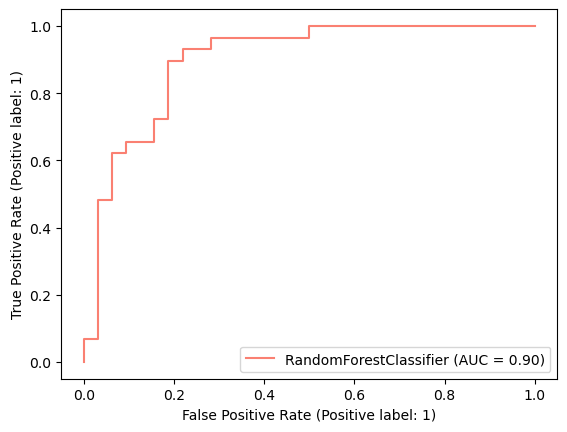

In [46]:
#ROC and AUC graph
RocCurveDisplay.from_estimator(gs_rf_clf.best_estimator_, x_test, y_test,color='salmon')
plt.show()

In [47]:
#confusion matrix
confusion_matrix(y_test,y_preds)

array([[24,  8],
       [ 2, 27]])

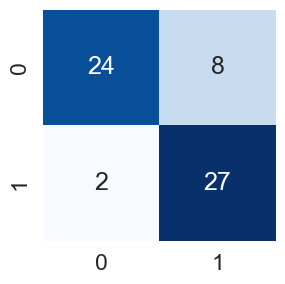

In [48]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cmap="Blues",
                    cbar=False)
plot_conf_mat(y_test,y_preds)
plt.show()


In [49]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83        32
           1       0.77      0.93      0.84        29

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



In [50]:
#calculating Classification report by crossvalidation using `cross_validation()`
gs_rf_clf.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 5,
 'n_estimators': 500}

In [51]:
clf = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=8,
    min_samples_split=5,
    n_estimators=500
)

In [52]:
# CrossValidation accuracy
crs_acc = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
crs_acc = crs_acc.mean()
crs_acc

0.840983606557377

#### Precision (Positive Predictive Value)

In [53]:
# CrossValidation pricision
crs_precision = cross_val_score(clf, x, y, cv=5, scoring='precision')
crs_precision = np.mean(crs_precision)
crs_precision

0.8285150375939849

#### Recall (Sensitivity or True Positive Rate)

In [54]:
# CrossValidation recall
crs_recall = cross_val_score(clf, x, y, cv=5, scoring='recall')
crs_recall = np.mean(crs_recall)
crs_recall

0.9028409090909092

#### F1 Score (Harmonic Mean of Precision & Recall)

In [55]:
# CrossValidation f1_score
crs_f1_score = cross_val_score(clf, x, y, cv=5, scoring='f1')
crs_f1_score = np.mean(crs_f1_score)
crs_f1_score

0.8586529954730378

### Cross-validation matrix

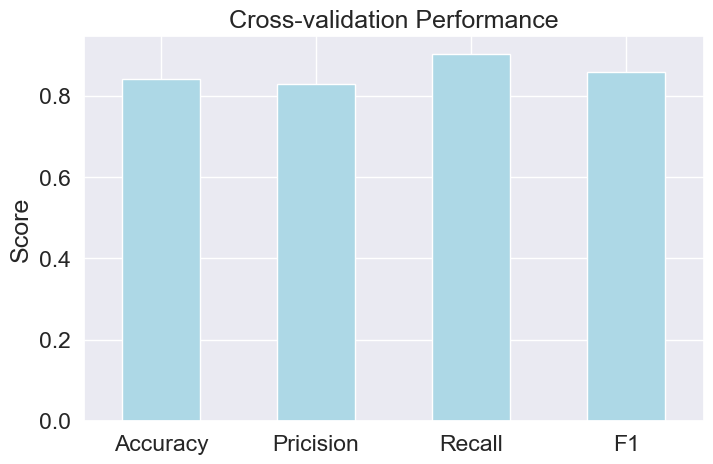

In [72]:
#lets see the Cross-validation matrix
cv_matrix = pd.DataFrame({'Accuracy':crs_acc,
                         'Pricision':crs_precision,
                         'Recall':crs_recall,
                         'F1':crs_f1_score},
                        index=[0])
cv_matrix.T.plot(kind='bar', figsize=(8, 5),color='lightblue')
plt.title("Cross-validation Performance")
plt.ylabel("Score")
plt.legend().remove()
plt.xticks(rotation=0)
plt.show()

## Feature Importance

Feature importance shows which data or attribute contributes the most to the model's prediction.

Finding the feature importance for `RandomForestClassifier()`

In [57]:
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=5,
                       n_estimators=500)

In [58]:
imp = clf.feature_importances_
imp_df = pd.DataFrame({'Feature Names':clf.feature_names_in_,
                      'Feature Importance':imp})
print(imp_df)

   Feature Names  Feature Importance
0            age            0.054717
1            sex            0.038132
2             cp            0.180200
3       trestbps            0.023690
4           chol            0.026173
5            fbs            0.000965
6        restecg            0.018738
7        thalach            0.095429
8          exang            0.079171
9        oldpeak            0.157725
10         slope            0.059460
11            ca            0.113761
12          thal            0.151837


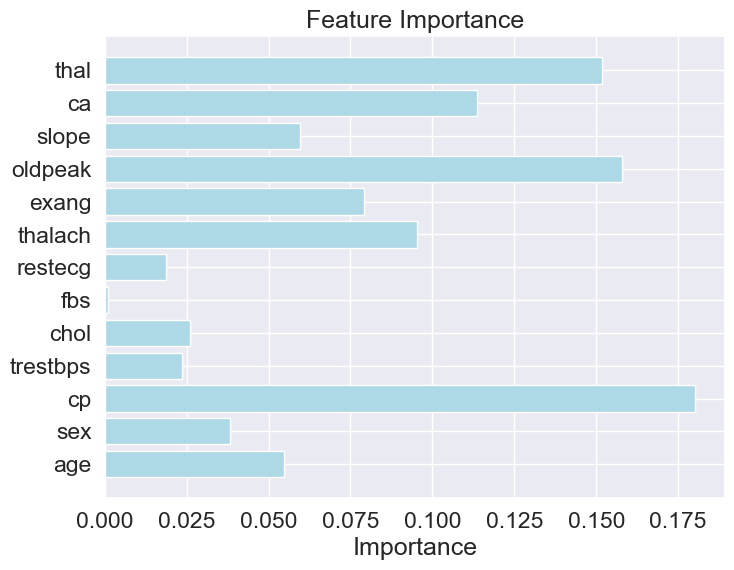

In [59]:
plt.figure(figsize=(8, 6))
plt.barh(clf.feature_names_in_,imp, color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importance')

plt.show()

 The most important features contributing to the model's prediction are **chest pain (cp), Thalium heart rate (thal), oldpeak, ca, and (Maximum heart rate)thalach**, with chest pain having the highest influence .